In [62]:
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

In [2]:
os.chdir('../imagesDetectionb/')
files = os.listdir()
img_sub = [cv2.imread(i) for i in files]

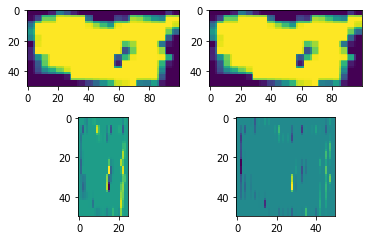

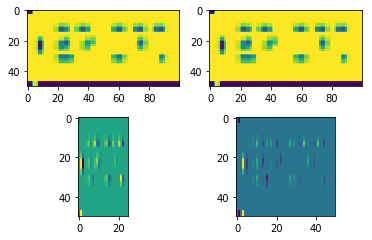

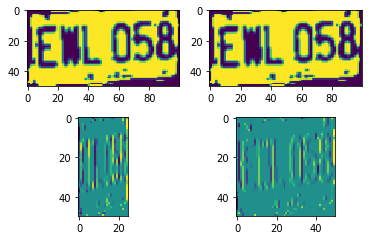

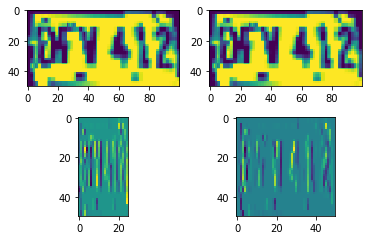

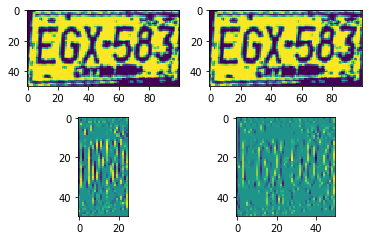

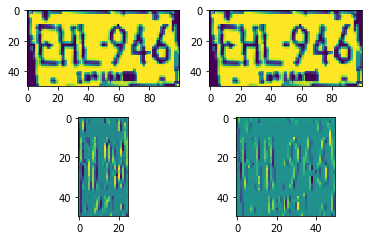

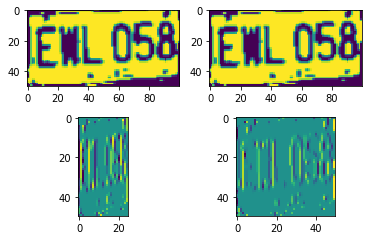

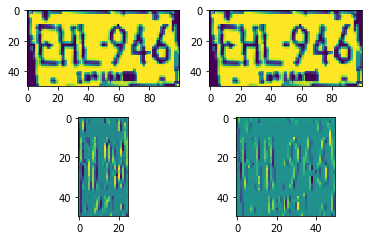

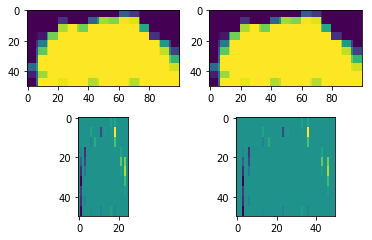

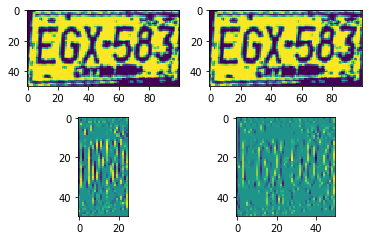

In [74]:
theta = np.linspace(0., 180., max(img.shape), endpoint=False)

for i in range(10):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    img = cv2.cvtColor(img_sub[i], cv2.COLOR_BGR2GRAY)/255
    ax1.imshow(img)
    img = cv2.medianBlur(img, 1)
    ax2.imshow(img)
    c1, c2, c3, c4 = pywt.wavedec(img, 'haar', level=3)
    ax3.imshow(c3)
    ax4.imshow(c4)
    plt.show()
#w2d(img, level=2)

In [5]:
import pywt
def w2d(img, mode='haar', level=1):
     # https://stackoverflow.com/a/24747729
    imArray = img
    #Datatype conversions
    #convert to grayscale
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    #Display result
    plt.imshow(imArray_H, cmap='gray')